<a href="https://colab.research.google.com/github/Kanyz/Practica_III/blob/main/TALLER_PARA_PARCIAL_N%C2%B03_Segunda_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

#Comportamiento de la Variable Talla de nacimiento (TALLA_NAC)
$X :=$ "Talla de nacimiento en centimetros de un recién nacido en Colombia"



---



# Estadística descriptiva para variables cuantitativas



*   Gráficos para datos univariados cualitativos.
*   Proporciones asociadas a los valores de una variable cualitativa.



In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [ ]:
tabla1 = tabla[['TALLA_NAC', 'T_GES', 'PESO_NAC']]
tabla1.head(4)

,TALLA_NAC,T_GES,PESO_NAC
COD_DPTO,,,
23,5,4,8
11,4,4,6
11,4,4,6
11,5,4,6


In [ ]:
df2 = tabla1[(tabla1 ["TALLA_NAC"] !=9) & (tabla1 ["T_GES"] !=9) & (tabla1 ["PESO_NAC"] !=9)]
df2.head(4)

,TALLA_NAC,T_GES,PESO_NAC
COD_DPTO,,,
23,5,4,8
11,4,4,6
11,4,4,6
11,5,4,6


In [ ]:
df2.TALLA_NAC.head(2)

,TALLA_NAC
COD_DPTO,
23,5
11,4


In [ ]:
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

/tmp/ipython-input-2047309688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


,TALLA_NAC
COD_DPTO,
23,5
11,4


In [ ]:
df2.loc [(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc [(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20 a 29"
df2.loc [(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30 a 39"
df2.loc [(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40 a 49"
df2.loc [(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50 a 59"
df2.loc [(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60 y más"
df2.loc [(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "S.I"
df2.head(5)

/tmp/ipython-input-3066523799.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Menos de 20' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc [(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"


,TALLA_NAC,T_GES,PESO_NAC
COD_DPTO,,,
23,5,4,8
11,4,4,6
11,4,4,6
11,5,4,6
11,5,4,6


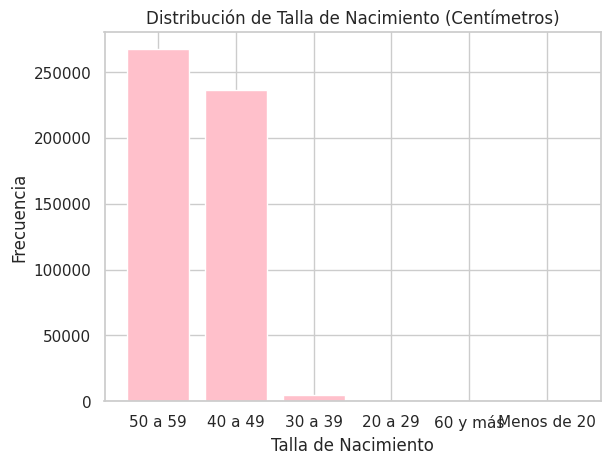

In [ ]:
#Diagrma de barras
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title("Distribución de Talla de Nacimiento (Centímetros)")
plt.xlabel("Talla de Nacimiento")
plt.ylabel("Frecuencia")
plt.show()

El valor 5 es el lapso de tiempo donde se tiene 267249 casos de talla del nacido, al nacer en Colombia (De 50 a 59 centímetros). Este comportamiento se observa de manera consistente en todos los grupos de tiempo de gestación, especialmente entre los rangos de 38 a 41 semanas, quienes concentran la mayor proporción de nacimientos: 72.2%, en el grupo de 38 a 41 semanas, 26.1% en 28 a 37 semanas y 1.2% en tiempo de gestación ignorado. Estos grupos, muestran que existe poca inferencia sobre la talla del nacido con respecto al tiempo de gestación, lo cual da lugar a una predominancia de una talla en específico en cualquiera da los casos.

El valor 4 es el lapso de tiempo donde se tiene 236277 casos de talla del nacido, al nacer en Colombia (De 40 a 49 centímetros). Este comportamiento se observa de manera consistente en todos los grupos de tiempo de gestación, especialmente entre los rangos de 38 a 41 semanas, quienes concentran la mayor proporción de nacimientos: 72.2%, en el grupo de 38 a 41 semanas, 26.1% en 28 a 37 semanas y 1.2% en tiempo de gestación ignorado. Estos grupos, muestran que existe poca inferencia sobre la talla del nacido con respecto al tiempo de gestación, lo cual da lugar a una predominancia de una talla en específico en cualquiera da los casos. Los valores 1, 2, 3, 6 tienen menos de 15000 casos de talla de nacimiento de un nacido en Colombia.

In [ ]:
sizes = np.array(y_values)
sizes

array([267217, 236199,   5071,    306,     20,      4])

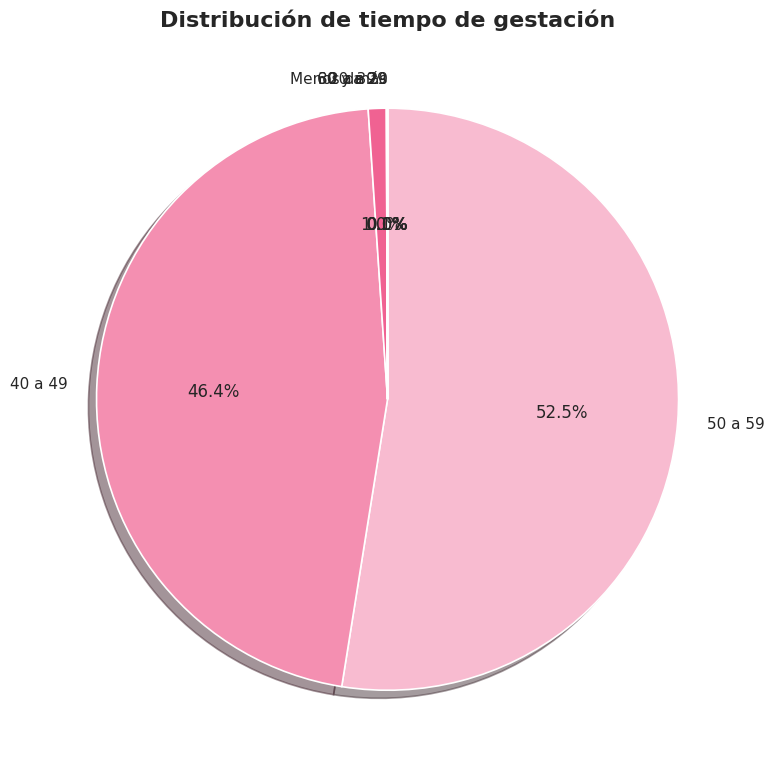

In [ ]:
colors = [
    "#F8BBD0",  # rosa claro pastel
    "#F48FB1",  # rosa medio suave
    "#F06292",  # rosa vivo
    "#EC407A",  # rosa intenso
    "#D81B60",  # rosa fuerte/frambuesa
    "#AD1457",  # rosa oscuro elegante
    "#880E4F"   # rosa vino profundo
]


plt.figure(figsize=(8,8))

plt.pie(
    y_values,
    labels=x_values,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=colors[:len(y_values)],
    wedgeprops={"edgecolor": "white", "linewidth": 1.2},
    shadow=True
)

plt.title("Distribución de tiempo de gestación", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
len(df2.T_GES)

508817

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['50 a 59' '40 a 49' '30 a 39' '20 a 29' '60 y más' 'Menos de 20']
[52.5173097596975, 46.4212084108825, 0.9966255058301904, 0.060139500056012284, 0.003930686278170737, 0.0007861372556341474]


Aproximadamente el 52.5173% de las tallas de nacimiento de recién nacidos en Colombia se dan entre 50 y 59 centímetros, entre 40 y 49 centímetros el 46.4212%, entre 30 y 39 centímetros, el 0.9966%, entre 20 y 29 centímetros el 0.0601%, entre 60 y más centímetros 0.0039% y menos de 20 centímetros el 0.0007%.

# Tablas de contingencia


*   Representación gráfica de una tabla de contigencia.
*   Proporciones asociadas a una tabla de contingencia.



In [ ]:
df2.loc [(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc [(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20 a 29"
df2.loc [(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30 a 39"
df2.loc [(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40 a 49"
df2.loc [(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50 y 59"
df2.loc [(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60 y más"
df2.loc [(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "S.I"

df2.TALLA_NAC, df2.T_GES = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)
df2.head(5)

/tmp/ipython-input-822345114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC, df2.T_GES = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)


,TALLA_NAC,T_GES,PESO_NAC
COD_DPTO,,,
23,50 a 59,4,8
11,40 a 49,4,6
11,40 a 49,4,6
11,50 a 59,4,6
11,50 a 59,4,6


In [ ]:
df2.loc [(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc [(df2.T_GES == "2"), "T_GES"] = "22 a 27"
df2.loc [(df2.T_GES == "3"), "T_GES"] = "28 a 37"
df2.loc [(df2.T_GES == "4"), "T_GES"] = "38 a 41"
df2.loc [(df2.T_GES == "5"), "T_GES"] = "42 y más"
df2.loc [(df2.T_GES == "6"), "T_GES"] = "Ignorado"
df2.loc [(df2.T_GES == "9"), "T_GES"] = "S.I"
df2.head(5)

,TALLA_NAC,T_GES,PESO_NAC
COD_DPTO,,,
23,50 a 59,38 a 41,8
11,40 a 49,38 a 41,6
11,40 a 49,38 a 41,6
11,50 a 59,38 a 41,6
11,50 a 59,38 a 41,6


Corresponde a la tabla con el eje X y Y vistas en su categoria ( X es el tipo de gestación y Y  es la talla de nacimiento)

In [ ]:
tabla_contingencia = pd.crosstab(df2.TALLA_NAC, df2.T_GES)
display(tabla_contingencia)

T_GES,22 a 27,28 a 37,38 a 41,42 y más,Ignorado,Menos de 22
TALLA_NAC,,,,,,
20 a 29,250,44,0,0,1,11
30 a 39,1646,3357,46,0,17,5
40 a 49,50,95454,140104,116,475,0
50 a 59,1,35657,230916,360,282,1
60 y más,0,0,19,1,0,0
Menos de 20,2,0,0,0,0,2


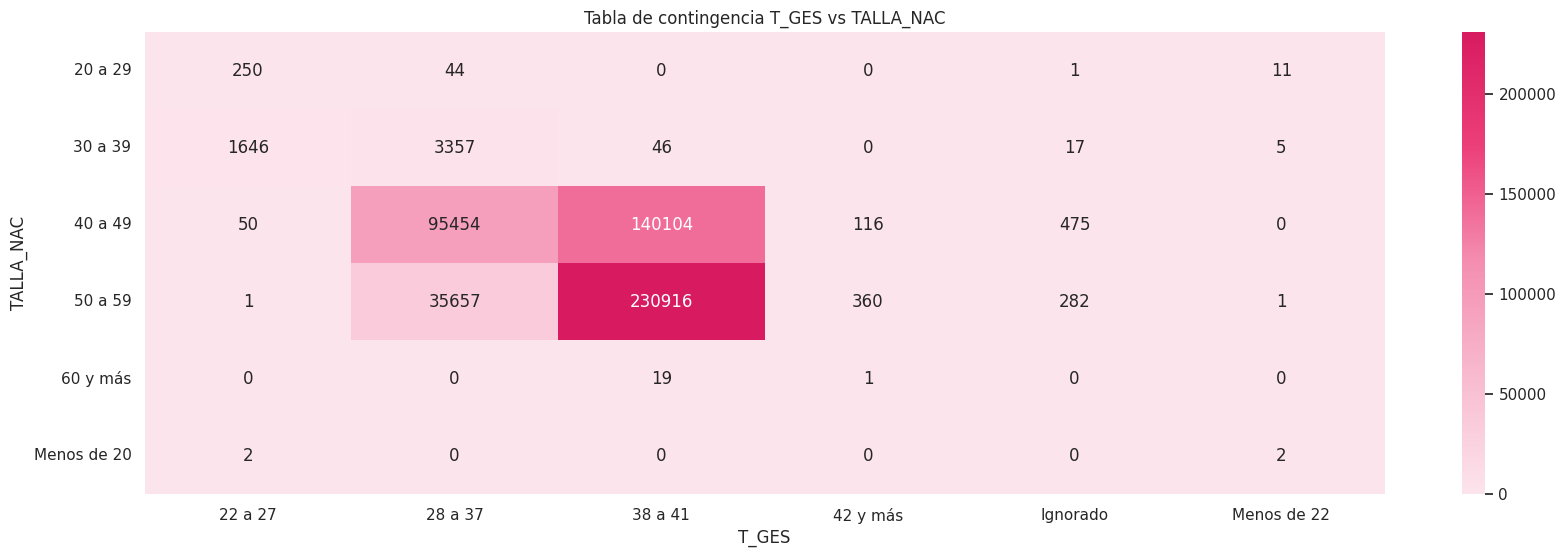

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Paleta rosa
rosa_pastel = LinearSegmentedColormap.from_list(
    "rosa_pastel",
    ["#FCE4EC", "#F8BBD0", "#F48FB1", "#EC407A", "#D81B60"]
)



sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(tabla_contingencia, annot=True, cmap=rosa_pastel, fmt="d")
plt.title("Tabla de contingencia T_GES vs TALLA_NAC")
plt.xlabel("T_GES")
plt.ylabel("TALLA_NAC")
plt.show()

In [ ]:
res = stats.chi2_contingency(tabla_contingencia)
print(res)

Chi2ContingencyResult(statistic=np.float64(283176.9370298712), pvalue=np.float64(0.0), dof=25, expected_freq=array([[1.17211886e+00, 8.08948443e+01, 2.23168664e+02, 2.86865415e-01,
        4.66081125e-01, 1.14265050e-02],
       [1.94242311e+01, 1.34058090e+03, 3.69832776e+03, 4.75390366e+00,
        7.72384767e+00, 1.89358846e-01],
       [9.04749352e+02, 6.24420959e+04, 1.72262141e+05, 2.21429164e+02,
        3.59764365e+02, 8.82002960e+00],
       [1.02356237e+03, 7.06420837e+04, 1.94883859e+05, 2.50507568e+02,
        4.07009151e+02, 9.97828885e+00],
       [7.66090756e-02, 5.28724473e+00, 1.45861872e+01, 1.87493735e-02,
        3.04628187e-02, 7.46830393e-04],
       [1.53218151e-02, 1.05744895e+00, 2.91723744e+00, 3.74987471e-03,
        6.09256373e-03, 1.49366079e-04]]))


In [ ]:
#Antes de la prueba chi-al cuadrado queremos ver si las variables presentan una distribucion normal
shapiro_test_tges = stats.shapiro(df2['T_GES'])
shapiro_test_talla = stats.shapiro(df2['TALLA_NAC'])

print(f"Shapiro-Wilk T_GES: p-value = {shapiro_test_tges.pvalue:.6f}")
print(f"Shapiro-Wilk TALLA_NAC: p-value = {shapiro_test_talla.pvalue:.6f}")

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 508817.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk T_GES: p-value = 0.000000
Shapiro-Wilk TALLA_NAC: p-value = 0.000000


Como el valor p es 0, esto indica que las variables son dependientes (una depende de la otra). Por lo tanto, queremos constatar la relación que presentan ambas variables mediante la prueba de hipótesis de asociación.

In [ ]:
#Prueba de hipótesis de asociación.
# Ho: X y Y no están asociadas.
# Ha: X y Y están asociadas.

res = stats.chi2_contingency(tabla_contingencia)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es: {chi}")
print(f"El valor p es: {valor_p}")

El valor de la estadística Chi cuadrado es: 283176.9370298712
El valor p es: 0.0




*   Si el valor p < 0.05 se rechaza la hipótesis nula.
*   Si el valor p > 0.05 no se rechaza la hipótesis nula.

Como el valor p $= 0.0 < 0.05$

El valor $0.0$ es un aproximado al ser el valor de la prueba Chi cuadrado tan alta.

Con una confianza del 95% se rechaza la hipótesis nula, es decir que, las variables están asociadas, por ende la edad de la madre y el tiempo de gestación presentan asociación.

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(chi + len(df2.T_GES)*min(6-1, 9-1)))
print(f"El coeficiente de contingencia es: {coeficiente_contingencia}")
print(f"El coeficiente phi es: {coeficiente_phi}")
print(f"El coeficiente VCramer es: {coeficiente_v_cramer}")

El coeficiente de contingencia es: 0.5979543250109541
El coeficiente phi es: 0.7460159853105474
El coeficiente VCramer es: 0.31647974265130574


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [The Measurement of Observer Agreement for Categorical Data](https://2024.sci-hub.st/2153/7a79ed8d1ae20779cbcdf5ab36348bc2/landis1977.pdf) se tiene que la talla de un recién nacido y el tiempo de gestación de un recién nacido en Colombia están insignificantemente asociadas.

Interpretación general:


*   Y depende ______ de X.
*   X y Y son ______ homogéneas.
*   X y Y están _____ asociadas.

Donde _____ = nula ($Chi, \phi, V = 0$), _______ = insignificante ($ 0< Chi, \phi, V < 0.2$), _______ = discretamente ($ 0.2 < Chi, \phi, V < 0.4$), _______ = Moderadamente($ 0.4 < Chi, \phi, V < 0.6$), _______ = Sustancialmente ($ 0.6 < Chi, \phi, V < 0.8$) y ________ = Fuertemente ($ 0.8 < Chi, \phi, V < 1$)

###**Comportamiento de TALLA_NAC (talla de nacimiento)**
La distribución de la talla al nacer en Colombia muestra una marcada concentración en dos intervalos principales. El rango de **50 a 59 cm** reúne aproximadamente el **53%** de los nacimientos, mientras que el intervalo de **40 a 49 cm** agrupa cerca del **47%** restante. En conjunto, estos dos rangos abarcan más del 99% de los casos registrados.

Las tallas inferiores a **40 cm** o superiores a **60 cm** son poco frecuentes, con una participación total menor al **1%** (como se ve en el gráfico circular). Esta concentración tan pronunciada alrededor de valores intermedios refleja un comportamiento coherente con la variabilidad biológica normal en poblaciones neonatales, donde la mayoría de los recién nacidos se sitúan dentro de un rango estándar y estable de talla.

### **Asociación entre T_GES y TALLA_NAC**  
Para evaluar la relación entre el tiempo de gestación (T_GES) y la talla del recién nacido (TALLA_NAC), se aplicó una prueba de chi-cuadrado:


Valor $p ≈ 0 (<0.05)$, lo que indica asociación estadísticamente significativa entre ambas variables.

Coeficientes de asociación:

- Coeficiente de contingencia: $C ≈ 0.598$
- Coeficiente $ϕ (phi): ϕ ≈ 0.746$
- V de Cramer: $V ≈ 0.316$

Según Landis & Koch (1977), valores entre 0.25-0.50 indican una asociación de fuertemente moderada.
Esto significa que, aunque existe dependencia estadística, la fuerza de la relación es moderada.

###Conclusión

Aunque existe una asociación estadísticamente significativa entre el tiempo de gestación y la talla del recién nacido, la fuerza de esta relación es moderada. Esto indica que, si bien a mayor tiempo de gestación suele corresponder una mayor talla al nacer, no es el único factor determinante en el crecimiento fetal de los nacidos vivos analizados.